In [25]:
from wordcloud.wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import json

In [26]:
address = r"C:\Users\get2b\Desktop\Arav\AI ML\DATA SETS\NLP Dataset\archive\Sarcasm_Headlines_Dataset_v2.json"
dataframe = pd.read_json(address, lines=True)
dataframe

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...
...,...,...,...
28614,1,jews to celebrate rosh hashasha or something,https://www.theonion.com/jews-to-celebrate-ros...
28615,1,internal affairs investigator disappointed con...,https://local.theonion.com/internal-affairs-in...
28616,0,the most beautiful acceptance speech this week...,https://www.huffingtonpost.com/entry/andrew-ah...
28617,1,mars probe destroyed by orbiting spielberg-gat...,https://www.theonion.com/mars-probe-destroyed-...


In [27]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import string
stopwords = list(stopwords.words("english")) + list(string.punctuation) + ['\'s']
print(stopwords)
print(len(stopwords))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [28]:
lines = []
target = dataframe['is_sarcastic']
for line in dataframe['headline']:
    line_tokens = word_tokenize(line)
    lines.append(line_tokens)
for i in range(0,2):
    print(lines[i])

['thirtysomething', 'scientists', 'unveil', 'doomsday', 'clock', 'of', 'hair', 'loss']
['dem', 'rep.', 'totally', 'nails', 'why', 'congress', 'is', 'falling', 'short', 'on', 'gender', ',', 'racial', 'equality']


In [29]:
comments = []
for line in lines:
    stopwords_rem = []
    for word in line:
        if word in stopwords:
            continue
        else:
            stopwords_rem.append(str(word))
    comments.append(stopwords_rem)
for i in range(0,5):
    print(comments[i])
del(lines)
del(dataframe)

['thirtysomething', 'scientists', 'unveil', 'doomsday', 'clock', 'hair', 'loss']
['dem', 'rep.', 'totally', 'nails', 'congress', 'falling', 'short', 'gender', 'racial', 'equality']
['eat', 'veggies', '9', 'deliciously', 'different', 'recipes']
['inclement', 'weather', 'prevents', 'liar', 'getting', 'work']
['mother', 'comes', 'pretty', 'close', 'using', 'word', "'streaming", 'correctly']


(-0.5, 399.5, 199.5, -0.5)

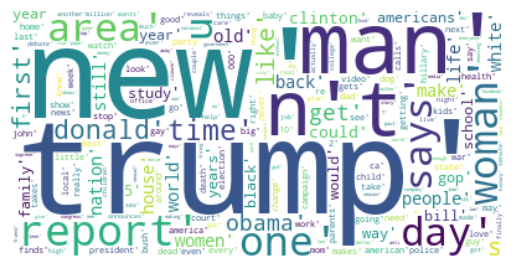

In [30]:
wordcloud = WordCloud(collocations = False, background_color = 'white').generate(str(comments))
# Display the generated Word Cloud
fig, ax = plt.subplots()
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")

##### We sorted found dictionary to get the most frequent word list in a time complexity of O(nLogn). By sorting we get the entire order of words and their importance. It works kind of like wordcloud but it doesnt visualize the data.

In [32]:
found = {}
for line in comments:
    for word in line:
        if word not in found.keys():
            found[word] = 1
        else:
            found[word] += 1
print(found.__len__())
found = sorted(found.items(), key=lambda item: item[1], reverse=True)
found[:100]

30432


[('trump', 1782),
 ('new', 1651),
 ('man', 1502),
 ("n't", 1147),
 ('report', 604),
 ('one', 544),
 ('woman', 544),
 ('area', 495),
 ('says', 485),
 ('day', 479),
 ('donald', 474),
 ('time', 454),
 ('like', 442),
 ('first', 432),
 ('obama', 423),
 ('get', 422),
 ('people', 420),
 ('u.s.', 411),
 ('women', 409),
 ('nation', 409),
 ('world', 390),
 ('house', 389),
 ('life', 372),
 ('still', 366),
 ('white', 356),
 ('make', 350),
 ('back', 344),
 ('could', 341),
 ('clinton', 339),
 ('family', 303),
 ('would', 301),
 ('americans', 291),
 ('way', 289),
 ('study', 276),
 ('gop', 274),
 ('years', 262),
 ('5', 259),
 ('bill', 258),
 ('year', 256),
 ('black', 256),
 ('president', 253),
 ('finds', 252),
 ('really', 249),
 ('school', 247),
 ('know', 245),
 ('police', 243),
 ('show', 241),
 ('america', 240),
 ('ca', 240),
 ('best', 237),
 ('state', 236),
 ('mom', 236),
 ('watch', 236),
 ('going', 234),
 ('home', 228),
 ('good', 228),
 ('american', 227),
 ('death', 227),
 ('video', 225),
 ('things'